### 处理数据集

In [15]:
import numpy as np
import pandas as pd

In [16]:
train = pd.read_csv("train_users_2.csv")
test = pd.read_csv("test_users.csv")

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

### 处理首次活跃特征

In [18]:
# 删除训练集的 date_first_booking,country_destination列
train.drop(columns=['date_first_booking','country_destination'],axis=1,inplace=True)
# 删除测试集的 date_first_booking
test.drop(columns=['date_first_booking'],axis=1,inplace=True)
# 整合训练集和测试集
data = pd.concat([train,test],axis=0,ignore_index=True) # 忽略原数据的索引,使用新索引
data.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [19]:
# 构造首次激活列 datetime(2020,01,03,11,00,30)
from datetime import datetime
data['first_active'] = data.timestamp_first_active.astype(str).apply(lambda x: datetime(int(x[:4]),
                                                                          int(x[4:6]), 
                                                                          int(x[6:8]),
                                                                          int(x[8:10]),
                                                                          int(x[10:12]),
                                                                          int(x[12:])))
data.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,first_active
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2009-03-19 04:32:55
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2009-05-23 17:48:09
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2009-06-09 23:12:47
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2009-10-31 06:01:29
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2009-12-08 06:11:05


In [20]:
data.dtypes

id                                 object
date_account_created               object
timestamp_first_active              int64
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
first_active               datetime64[ns]
dtype: object

In [21]:
data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
first_active                    0
dtype: int64

In [22]:
# 构造激活日期的年,月,日特征  (结束时间-开始时间).days ->变成整数的天  timedelta
# pd.to_datetime(data['first_active'],errors='coerce')
data['year'] = data.first_active.dt.year
data['month'] = data.first_active.dt.month
data['day'] = data.first_active.dt.day
# 构造工作日特征
data['weekday'] = data.first_active.apply(lambda x:x.isoweekday())
data.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,first_active,year,month,day,weekday
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2009-03-19 04:32:55,2009,3,19,4
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2009-05-23 17:48:09,2009,5,23,6
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2009-06-09 23:12:47,2009,6,9,2
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2009-10-31 06:01:29,2009,10,31,6
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2009-12-08 06:11:05,2009,12,8,2


In [23]:
data.weekday.value_counts()

2    45514
3    43847
1    41926
4    41883
5    38076
6    32212
7    32089
Name: weekday, dtype: int64

In [24]:
# 删除timestamp_first_active列
data.drop(['timestamp_first_active'],axis=1,inplace=True)
data.head()

,id,date_account_created,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,first_active,year,month,day,weekday
0,gxn3p5htnn,2010-06-28,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2009-03-19 04:32:55,2009,3,19,4
1,820tgsjxq7,2011-05-25,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2009-05-23 17:48:09,2009,5,23,6
2,4ft3gnwmtx,2010-09-28,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2009-06-09 23:12:47,2009,6,9,2
3,bjjt8pjhuk,2011-12-05,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2009-10-31 06:01:29,2009,10,31,6
4,87mebub9p4,2010-09-14,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2009-12-08 06:11:05,2009,12,8,2


In [25]:
# 定义一个季节生成函数
def gen_season(param): # generate
    if param in {3,4,5}:
        return 'spring'
    elif param in {6,7,8}:
        return 'summer'
    elif param in {9,10,11}:
        return 'autumn'
    else:
        return 'winter'
# 此函数只适应于北半球温带及寒带，不适合赤道地区和南半球，需要谨慎对待

In [26]:
data['season'] = data['month'].apply(gen_season)

In [27]:
data.head()

,id,date_account_created,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,first_active,year,month,day,weekday,season
0,gxn3p5htnn,2010-06-28,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2009-03-19 04:32:55,2009,3,19,4,spring
1,820tgsjxq7,2011-05-25,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2009-05-23 17:48:09,2009,5,23,6,spring
2,4ft3gnwmtx,2010-09-28,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2009-06-09 23:12:47,2009,6,9,2,summer
3,bjjt8pjhuk,2011-12-05,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2009-10-31 06:01:29,2009,10,31,6,autumn
4,87mebub9p4,2010-09-14,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2009-12-08 06:11:05,2009,12,8,2,winter


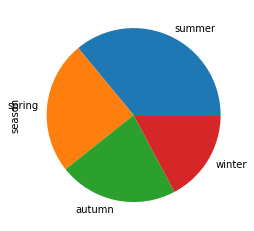

In [28]:
# import matplotlib.pyplot as plt
data.season.value_counts().plot(kind='pie')
# plt.show()

### 独热编码(onehot encoder)

假设某列(或称之为特征)有4种取值方式 初中,高中,本科,硕士

独热编码之后某一行的学历特征就变成了了4列,比如初中变成了0001,高中变成了0010,本科变成了0100,硕士变成了1000

In [29]:
pd.get_dummies(data.season, prefix='season') # 独热编码有什么作用?

,season_autumn,season_spring,season_summer,season_winter
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
275542,1,0,0,0
275543,1,0,0,0
275544,1,0,0,0
275545,1,0,0,0


In [30]:
# 把首次活跃日期的季节独热编码 0.2f1+0.2f2+0.3f3+0.3f4=1
df_season = pd.get_dummies(data.season, prefix='season')
data = pd.concat((data,df_season),axis=1)
# 把首次活跃日期的星期独热编码
df_active_wd = pd.get_dummies(data.weekday,prefix='actwd')
data = pd.concat((data,df_active_wd),axis=1)
# 删除季节和星期列
data.drop(['season','weekday'],axis=1,inplace=True)
data.head() #稀疏矩阵

,id,date_account_created,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,season_spring,season_summer,season_winter,actwd_1,actwd_2,actwd_3,actwd_4,actwd_5,actwd_6,actwd_7
0,gxn3p5htnn,2010-06-28,-unknown-,NaN,facebook,0,en,direct,direct,untracked,...,1,0,0,0,0,0,1,0,0,0
1,820tgsjxq7,2011-05-25,MALE,38.0,facebook,0,en,seo,google,untracked,...,1,0,0,0,0,0,0,0,1,0
2,4ft3gnwmtx,2010-09-28,FEMALE,56.0,basic,3,en,direct,direct,untracked,...,0,1,0,0,1,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,FEMALE,42.0,facebook,0,en,direct,direct,untracked,...,0,0,0,0,0,0,0,0,1,0
4,87mebub9p4,2010-09-14,-unknown-,41.0,basic,0,en,direct,direct,untracked,...,0,0,1,0,1,0,0,0,0,0


### 处理账户创建时间特征

In [31]:
# 把账户创建日期转化成日期格式
dac = pd.to_datetime(data.date_account_created)
# 获取month列
dac_month = dac.dt.month
# 依据month生成season列
dac_season = dac_month.apply(gen_season)
dac_season.head()

0    summer
1    spring
2    autumn
3    winter
4    autumn
Name: date_account_created, dtype: object

In [32]:
df_dac = pd.get_dummies(dac_season,prefix="dac")
data = pd.concat((data,df_dac),axis=1)
data.head()

,id,date_account_created,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,actwd_2,actwd_3,actwd_4,actwd_5,actwd_6,actwd_7,dac_autumn,dac_spring,dac_summer,dac_winter
0,gxn3p5htnn,2010-06-28,-unknown-,NaN,facebook,0,en,direct,direct,untracked,...,0,0,1,0,0,0,0,0,1,0
1,820tgsjxq7,2011-05-25,MALE,38.0,facebook,0,en,seo,google,untracked,...,0,0,0,0,1,0,0,1,0,0
2,4ft3gnwmtx,2010-09-28,FEMALE,56.0,basic,3,en,direct,direct,untracked,...,1,0,0,0,0,0,1,0,0,0
3,bjjt8pjhuk,2011-12-05,FEMALE,42.0,facebook,0,en,direct,direct,untracked,...,0,0,0,0,1,0,0,0,0,1
4,87mebub9p4,2010-09-14,-unknown-,41.0,basic,0,en,direct,direct,untracked,...,1,0,0,0,0,0,1,0,0,0


In [33]:
# 时间差
data['date_account_created'] = pd.to_datetime(data['date_account_created'])

In [34]:
time_diff = (data['first_active']-data['date_account_created']).dt.days #减法
time_diff.value_counts()

 0      275369
-1           7
-6           4
-7           4
-2           4
         ...  
-78          1
-76          1
-331         1
-587         1
-362         1
Length: 143, dtype: int64

In [35]:
# 分箱操作
# 创建一个间隔函数,对首次激活和创建账户之间的间隔进行分类,间隔0返回一天之内,间隔1天到30天返回一月之内,间隔30天到365天返回一年之内,其余的返回其他
def gen_span(param):
    if param == 0:
        return '一天之内'
    elif (param>-30)&(param<-1):
        return '一月之内'
    elif (param>-365)&(param<-30):
        return '一年之内'
    else:
        return '其他'

In [36]:
# 生成间隔列
data['span'] = time_diff.apply(gen_span)
data.head()

,id,date_account_created,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,actwd_3,actwd_4,actwd_5,actwd_6,actwd_7,dac_autumn,dac_spring,dac_summer,dac_winter,span
0,gxn3p5htnn,2010-06-28,-unknown-,NaN,facebook,0,en,direct,direct,untracked,...,0,1,0,0,0,0,0,1,0,其他
1,820tgsjxq7,2011-05-25,MALE,38.0,facebook,0,en,seo,google,untracked,...,0,0,0,1,0,0,1,0,0,其他
2,4ft3gnwmtx,2010-09-28,FEMALE,56.0,basic,3,en,direct,direct,untracked,...,0,0,0,0,0,1,0,0,0,其他
3,bjjt8pjhuk,2011-12-05,FEMALE,42.0,facebook,0,en,direct,direct,untracked,...,0,0,0,1,0,0,0,0,1,其他
4,87mebub9p4,2010-09-14,-unknown-,41.0,basic,0,en,direct,direct,untracked,...,0,0,0,0,0,1,0,0,0,一年之内


In [37]:
# 对间隔特征进行独热编码
df_span = pd.get_dummies(data.span,prefix='span')
data = pd.concat((data,df_span),axis=1)
data.drop(['span'],axis=1,inplace=True)

In [38]:
data.columns

Index(['id', 'date_account_created', 'gender', 'age', 'signup_method',
       'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'first_active', 'year', 'month', 'day',
       'season_autumn', 'season_spring', 'season_summer', 'season_winter',
       'actwd_1', 'actwd_2', 'actwd_3', 'actwd_4', 'actwd_5', 'actwd_6',
       'actwd_7', 'dac_autumn', 'dac_spring', 'dac_summer', 'dac_winter',
       'span_一天之内', 'span_一年之内', 'span_一月之内', 'span_其他'],
      dtype='object')

In [39]:
# 丢弃账户创建日期和首次激活日期
data.drop(['date_account_created','first_active'],axis=1,inplace=True)

In [40]:
data.isnull().sum()

id                              0
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
year                            0
month                           0
day                             0
season_autumn                   0
season_spring                   0
season_summer                   0
season_winter                   0
actwd_1                         0
actwd_2                         0
actwd_3                         0
actwd_4                         0
actwd_5                         0
actwd_6                         0
actwd_7                         0
dac_autumn                      0
dac_spring                      0
dac_summer                      0
dac_winter    

### 处理年龄特征

In [41]:
# 处理年龄特征
data.age.value_counts()

30.0      7712
28.0      7687
29.0      7647
31.0      7540
27.0      7462
          ... 
1954.0       1
1953.0       1
132.0        1
1937.0       1
112.0        1
Name: age, Length: 145, dtype: int64

- 可以看到有些人把年龄填成了出生日期,所以需要把这些数据清理

In [42]:
# 把年龄的空值填充成-1
data['age'].fillna(-1,inplace=True)

In [43]:
# 定义函数把大于1900的数值处理为正常年龄
def calc_age(param):
    if param > 1900:
        return 2014 - param
    else:
        return param

In [44]:
# 处理年龄列数据
data.age = data['age'].apply(calc_age)
data.age.value_counts()

-1.0      116866
 30.0       7712
 28.0       7687
 29.0       7647
 31.0       7540
           ...  
 14.0          1
 12.0          1
 132.0         1
 6.0           1
 112.0         1
Name: age, Length: 112, dtype: int64

In [45]:
# 把年龄列离散化
div = 15
def get_age(age):
    # 将连续型转换为离散型
    if age < 0:
        return 'NaN' #空值
    elif (age < div):
        return div #如果年龄小于15岁，那么返回15岁
    elif (age <= div * 2):
        return div*2 #如果年龄大于15小于等于30岁，则返回30岁
    elif (age <= div * 3):
        return div * 3
    elif (age <= div * 4):
        return div * 4
    elif (age <= div * 5):
        return div * 5
    elif (age <= 110):
        return div * 6
    else:
        return 'Unphysical' #非正常年龄
data['age'] = data['age'].apply(get_age)
data.age.value_counts()

NaN           116866
45             67781
30             59465
60             21386
75              6483
90              2728
15               816
Unphysical        22
Name: age, dtype: int64

In [46]:
# 年龄独热编码
df_age = pd.get_dummies(data.age,prefix='age')
data = pd.concat((data,df_age),axis=1)
# data.drop(['age'],axis=1,inplace=True)
data.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser', 'year', 'month',
       'day', 'season_autumn', 'season_spring', 'season_summer',
       'season_winter', 'actwd_1', 'actwd_2', 'actwd_3', 'actwd_4', 'actwd_5',
       'actwd_6', 'actwd_7', 'dac_autumn', 'dac_spring', 'dac_summer',
       'dac_winter', 'span_一天之内', 'span_一年之内', 'span_一月之内', 'span_其他',
       'age_15', 'age_30', 'age_45', 'age_60', 'age_75', 'age_90', 'age_NaN',
       'age_Unphysical'],
      dtype='object')

In [47]:
"""
把注册前第一个接触的市场渠道按年龄分组充填空值,
年轻人喜欢用脸书,年老的喜欢用推特,再老一些的喜欢看报纸
把各个年龄段的渠道空值用此年龄段的渠道众数填充
"""
data.groupby('age')['first_affiliate_tracked'].apply(lambda x:x.fillna(x.mode()))

0             untracked
1             untracked
2             untracked
3             untracked
4             untracked
              ...      
275542        untracked
275543        untracked
275544           linked
275545              omg
275546    tracked-other
Name: first_affiliate_tracked, Length: 275547, dtype: object

In [50]:
data.isnull().sum()

id                            0
gender                        0
age                           0
signup_method                 0
signup_flow                   0
language                      0
affiliate_channel             0
affiliate_provider            0
first_affiliate_tracked    6085
signup_app                    0
first_device_type             0
first_browser                 0
year                          0
month                         0
day                           0
season_autumn                 0
season_spring                 0
season_summer                 0
season_winter                 0
actwd_1                       0
actwd_2                       0
actwd_3                       0
actwd_4                       0
actwd_5                       0
actwd_6                       0
actwd_7                       0
dac_autumn                    0
dac_spring                    0
dac_summer                    0
dac_winter                    0
span_一天之内                     0
span_一年之

In [49]:
for i,v in data.groupby('age')['first_affiliate_tracked']:
    print(i,v)

15 193                 NaN
388           untracked
482       tracked-other
642                 NaN
660           untracked
              ...      
263285        untracked
267268        untracked
269299        untracked
269408        untracked
273719        untracked
Name: first_affiliate_tracked, Length: 816, dtype: object
30 19        untracked
21           linked
25        untracked
33              NaN
37        untracked
            ...    
275506          omg
275510          omg
275520    untracked
275535    untracked
275536       linked
Name: first_affiliate_tracked, Length: 59465, dtype: object
45 1         untracked
3         untracked
4         untracked
10        untracked
13           linked
            ...    
275532    untracked
275534    untracked
275539    untracked
275540       linked
275542    untracked
Name: first_affiliate_tracked, Length: 67781, dtype: object
60 2             untracked
6             untracked
7                   omg
8             untracked
9         

In [51]:
for i,v in data.groupby('age')['first_affiliate_tracked']:
    print(i,v.mode())

15 0    untracked
dtype: object
30 0    untracked
dtype: object
45 0    untracked
dtype: object
60 0    untracked
dtype: object
75 0    untracked
dtype: object
90 0    untracked
dtype: object
NaN 0    untracked
dtype: object
Unphysical 0    untracked
dtype: object


In [43]:
for i,v in data.groupby('age')['first_affiliate_tracked']:
    print(i,v.mode().values)

15 ['untracked']
30 ['untracked']
45 ['untracked']
60 ['untracked']
75 ['untracked']
90 ['untracked']
NaN ['untracked']
Unphysical ['untracked']


In [38]:
data.groupby('age')['first_affiliate_tracked'].apply(lambda x:x.fillna(x.mode().values[0]))

0             untracked
1             untracked
2             untracked
3             untracked
4             untracked
5                   omg
6             untracked
7                   omg
8             untracked
9                   omg
10            untracked
11            untracked
12            untracked
13               linked
14            untracked
15            untracked
16            untracked
17            untracked
18            untracked
19            untracked
20            untracked
21               linked
22            untracked
23            untracked
24            untracked
25            untracked
26            untracked
27            untracked
28            untracked
29            untracked
              ...      
275517        untracked
275518        untracked
275519        untracked
275520        untracked
275521        untracked
275522        untracked
275523        untracked
275524        untracked
275525           linked
275526              omg
275527        un